In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# import csv file

df=pd.read_csv('car_price.csv')

In [3]:
# shape of the dataset

df.shape

(19237, 19)

In [4]:
# Top 5 rows

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Unnamed: 18
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,NaN


In [5]:
# Remove unwanted columns

df.drop(columns=['Unnamed: 18'],inplace=True)

In [6]:
# Summary of the dataset

df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
# Datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

# Exploratory Data Analysis

In [8]:
# Top 10 most sold cars

df['Manufacturer'].value_counts()[:10]

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
Name: count, dtype: int64

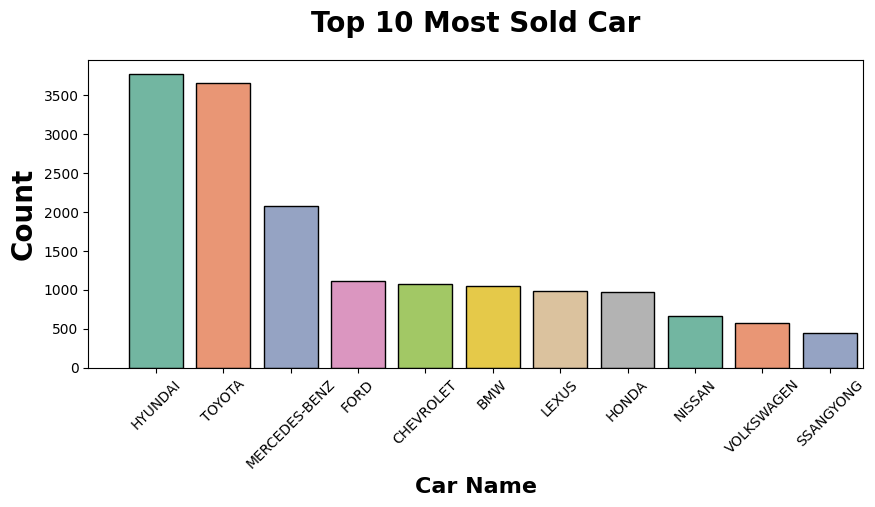

In [9]:
# Bar chart to visualize the data

plt.subplots(figsize=(10,4))
sb.countplot(x="Manufacturer", data=df,ec = "black",palette="Set2",order = df['Manufacturer'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

* Hydundai and Toyato are the most sold cars, with Hydundai at the first spot.

In [10]:
# Mean price of the car that is sold the most
df[df['Manufacturer']=='HYUNDAI']['Price'].mean()

# Average selling price of the cars 

22338.447864154947

* The average selling price of Hyundai is $22338.4

In [11]:
# Rank of each manufacturer as per their mean price

mean_price_rank=df.groupby('Manufacturer')['Price'].mean().rank(ascending=False).sort_values()
data=pd.DataFrame({'Name':mean_price_rank.index,'Rank':mean_price_rank.values})
data

,Name,Rank
0,LAMBORGHINI,1.0
1,BENTLEY,2.0
2,OPEL,3.0
3,FERRARI,4.0
4,LAND ROVER,5.0
...,...,...
60,VAZ,61.0
61,MOSKVICH,62.0
62,ZAZ,63.0
63,ROVER,64.0


In [12]:
# Comparing it with the rank of Hyundai

data[data['Name']=='HYUNDAI']

,Name,Rank
12,HYUNDAI,13.0


* Rank of the brand with the highest sales is 13. It implies that price has impact its sales

In [13]:
# Top 10 most expensive cars

top_10_cars=df.groupby('Model')['Price'].max().sort_values(ascending=False)[:10]
top_10_cars=top_10_cars.to_frame()
top_10_cars

,Price
Model,
Combo,26307500
Urus,872946
G 65 AMG 63AMG,627220
911,308906
Range Rover Vogue,297930
AMG GT S,297930
M5 Машина в максимально,288521
LX 570,260296
GLE 400 A M G,254024


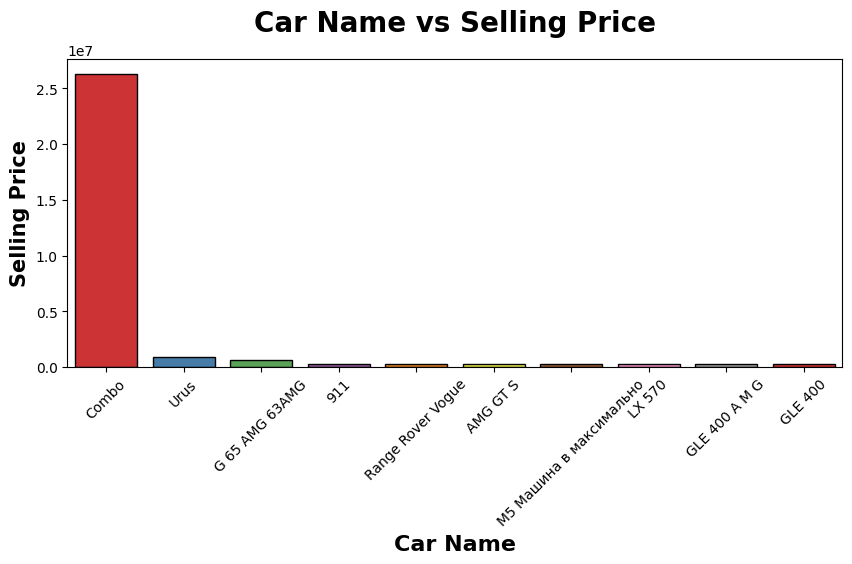

In [14]:
plt.subplots(figsize=(10,4))
sb.barplot(x=top_10_cars.index, y=top_10_cars['Price'],ec = "black",palette="Set1")
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.show()

- The most expensive car is Combo, followed by Urus
- The diagram states that Combo is an outlier and the next 9 cars are in the same price range 

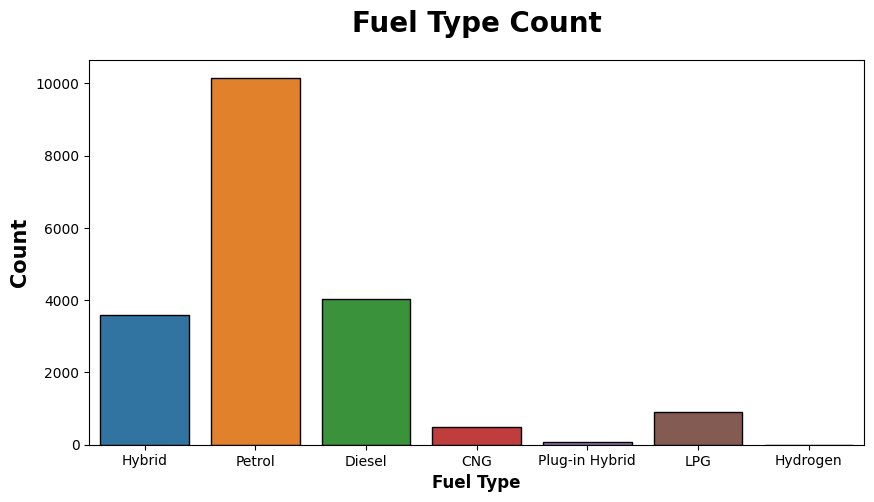

In [15]:
# Most preferred fuel type

plt.subplots(figsize=(10,5))
sb.countplot(x=df['Fuel type'], ec = "black")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

* Cars that run on petrol are dominate the market, while Plug-in Hybrid and Hydrogen powered cars are least preferred. 

In [16]:
# Fuel Type vs Selling Price

fuel_price=df.groupby('Fuel type')['Price'].median() #Median is used to nullify the effect of outliers
fuel_price=fuel_price.to_frame()
fuel_price

,Price
Fuel type,
CNG,7527.0
Diesel,20489.5
Hybrid,10036.0
Hydrogen,20385.0
LPG,11604.0
Petrol,12858.0
Plug-in Hybrid,22737.0


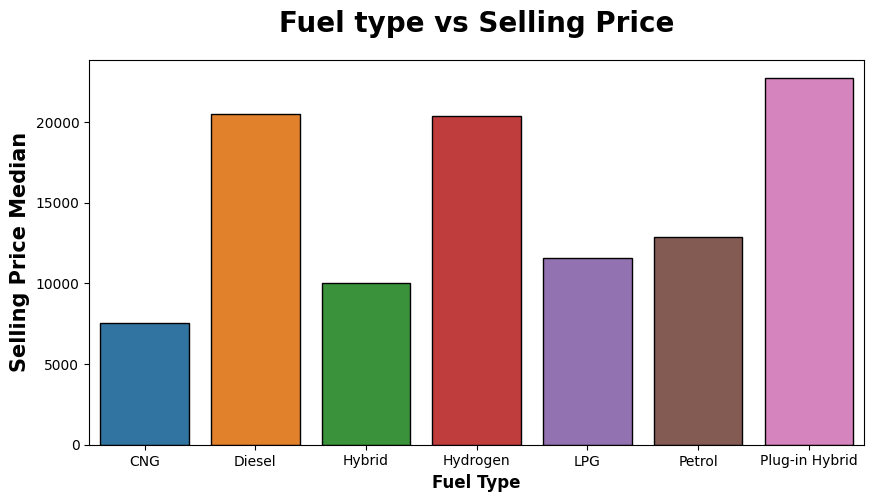

In [17]:
plt.subplots(figsize=(10,5))
sb.barplot(x=fuel_price.index, y=fuel_price['Price'], ec = "black")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

- The diagram depicts that Plug-in Hyrid fuel type have higher selling average price, whereas CNG is the lowest.
- Additionally, it suggests that a car's fuel type has a significant impact on its selling price as cars that run on petrol account for most no of sales as depicted above. 

In [18]:
# Analysif of a car's production year

df['Yrs in Use']=2023-df['Prod. year']

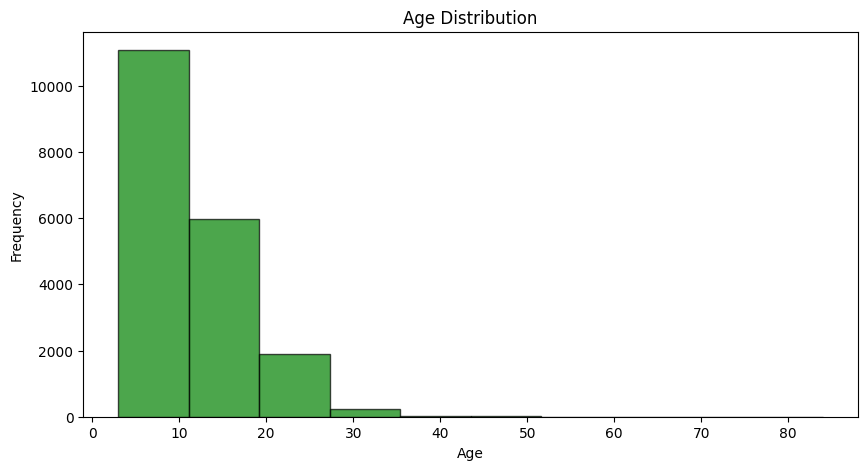

In [19]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Yrs in Use'], bins=10, edgecolor='k', alpha=0.7,color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* The graph shows that the majority of the vehicles in use were introduced less than ten years ago. As the years go by, the no dramatically drops.

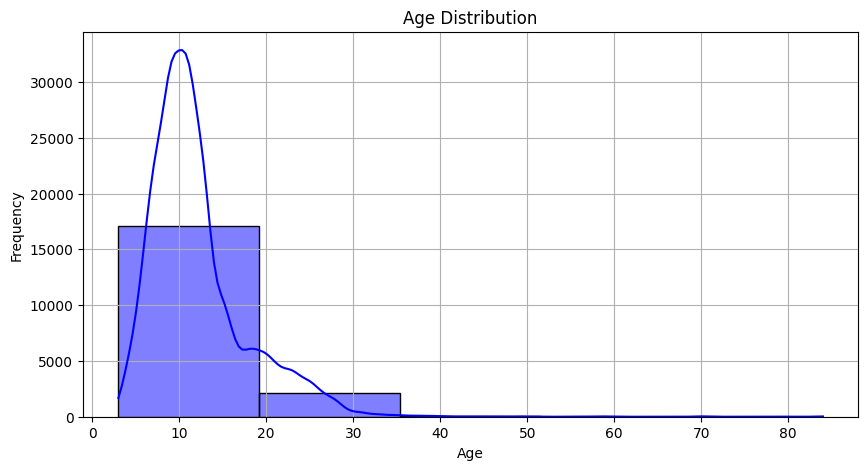

In [20]:
# Age distribution of cars

plt.figure(figsize=(10, 5))
sb.histplot(data=df,x=df['Yrs in Use'], bins=5, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* According to the graph, the bulk of cars were introduced within the past 20 years, and just a small percentage are older.

In [21]:
# Correlation between Price and Levy

df['Levy']=df['Levy'].str.replace('-','0')
df['Levy']=df['Levy'].astype('int')

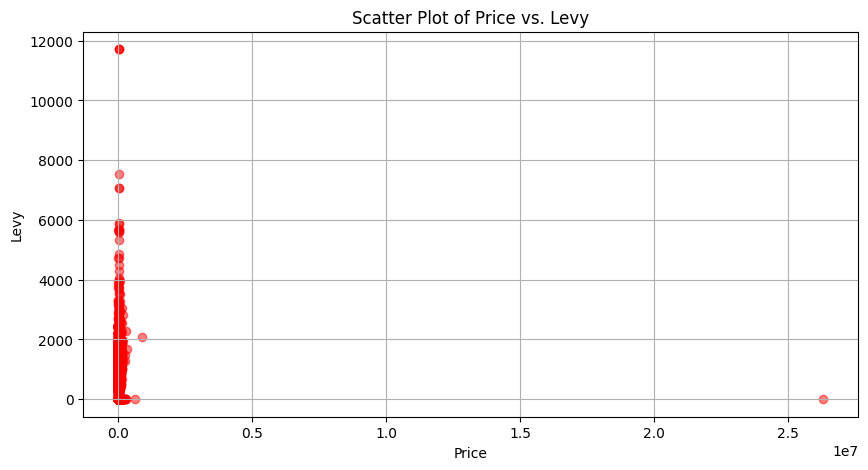

Correlation Coefficient: -0.0037011073446076748


In [22]:
# Calculate the correlation coefficient
correlation_coefficient = df['Price'].corr(df['Levy'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
plt.scatter(df['Price'], df['Levy'], alpha=0.5, color='red')
plt.title('Scatter Plot of Price vs. Levy')
plt.xlabel('Price')
plt.ylabel('Levy')
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

* As the correlation coefficient is almost 0, it can be deduced that price has very little impact on levy.

In [23]:
# Pivot table to calculate the average Price for each Manufacturer and Leather interior

pivot_avg_price = df.pivot_table(index='Manufacturer', columns='Leather interior', values='Price', aggfunc='mean',fill_value=0)

In [24]:
pivot_avg_price

Leather interior,No,Yes
Manufacturer,,
ACURA,69.000000,6328.214286
ALFA ROMEO,8522.000000,11258.500000
ASTON MARTIN,0.000000,54000.000000
AUDI,8904.400000,14318.877551
BENTLEY,0.000000,197574.500000
...,...,...
VAZ,4435.166667,5862.500000
VOLKSWAGEN,9163.913242,13146.963889
VOLVO,8179.000000,10838.866667


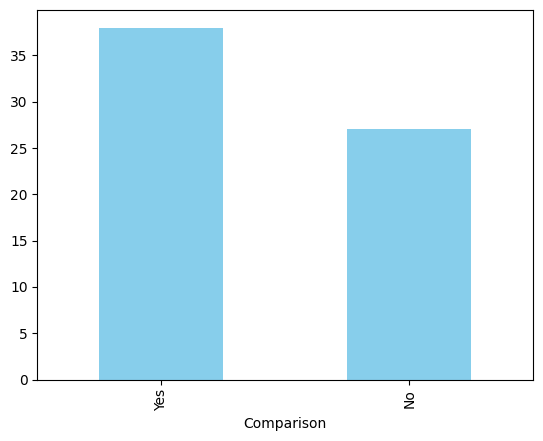

In [25]:
# Comparison of the 2 columns to check what costs more

def check(x):
    if x['No']>x['Yes']:
        return 'No'
    else:
        return 'Yes'
pivot_avg_price['Comparison'] =pivot_avg_price.apply(check, axis=1)
pivot_avg_price['Comparison'].value_counts().plot(kind='bar',color='skyblue');

* As per to the graph, cars with leather interiors often cost more than those without leather interiors.

In [26]:
# Average prices of vehicles from the start to the end

avg_price=df.groupby('Prod. year',as_index=False)['Price'].mean()
avg_price

,Prod. year,Price
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000
5,1964,6585.500000
6,1965,65074.000000
7,1968,2200.000000
8,1973,15681.000000
9,1974,2437.000000


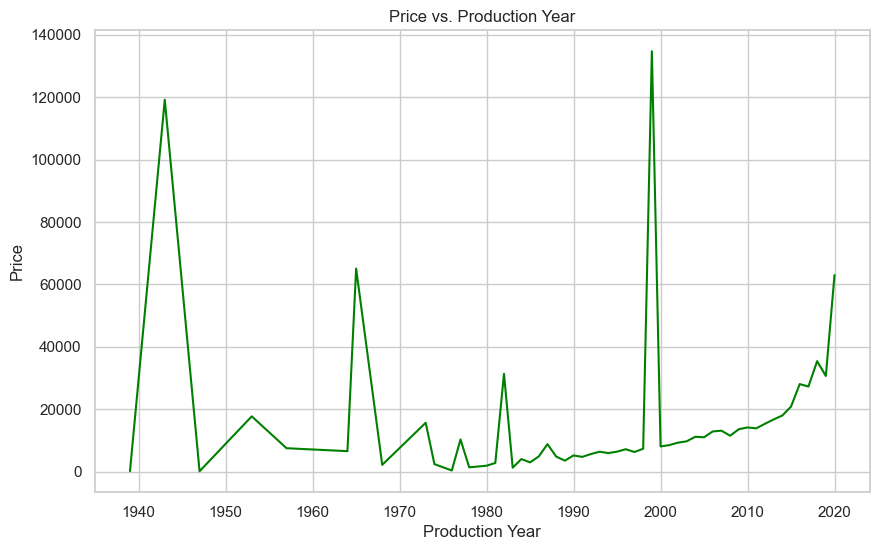

In [32]:
# Plot to view the trend during the period

sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a line chart
sb.lineplot(x='Prod. year', y='Price', data=avg_price, color='green')

# Customize labels and title
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Price vs. Production Year')

# Show the plot
plt.show();

* The pattern illustrates that the average cost of vehicles has varied throughout time, with a clear increase between the 1940s and 1950s and before the early 2000s.
* Despite variations and outliers, there seems to be an overall upward trend in pricing throughout time.
* Another surge is noticed in the late 2010s, which suggests that more purchases were made at that time.